In [32]:
#Import libraries to start data exploration/visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [33]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
#Convert total charges from object to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

#drop customerID as it does not matter for our analysis 
df = df.drop(columns = 'customerID')

In [36]:
#Start by getting a sense of our data
df.describe()

#We don't have a lot of numeric data. Later on we will need to encode most of our columns for our future classification

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\an6103147\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\an6103147\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


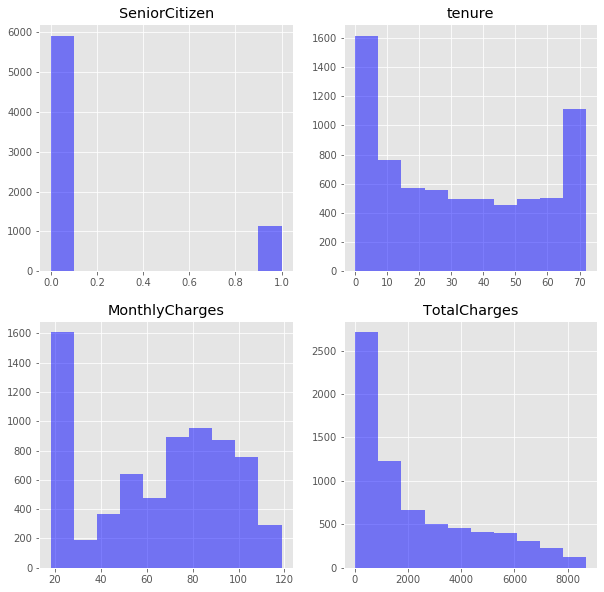

In [37]:
#Create a list of our numeric variables
hists = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

#create figure for our histograms
fig = plt.figure(figsize=(10,10))

for idx, val in enumerate(hists):
    plt.subplot(2,2,idx+1)
    plt.hist(val, data = df, alpha = 0.5, color = 'blue')
    plt.title(val)
    
#Why aren't these graphs properly normalized? 

In [38]:
#We are lacking numeric data, so let's convert our A/B type strings into binary

#Find all columns that are candidates for binary conversion
#Did not use .all() because columns with NAN value were not showing up
cat = df[df.columns[df.isin(['No','Yes']).any()]]
cat.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Yes


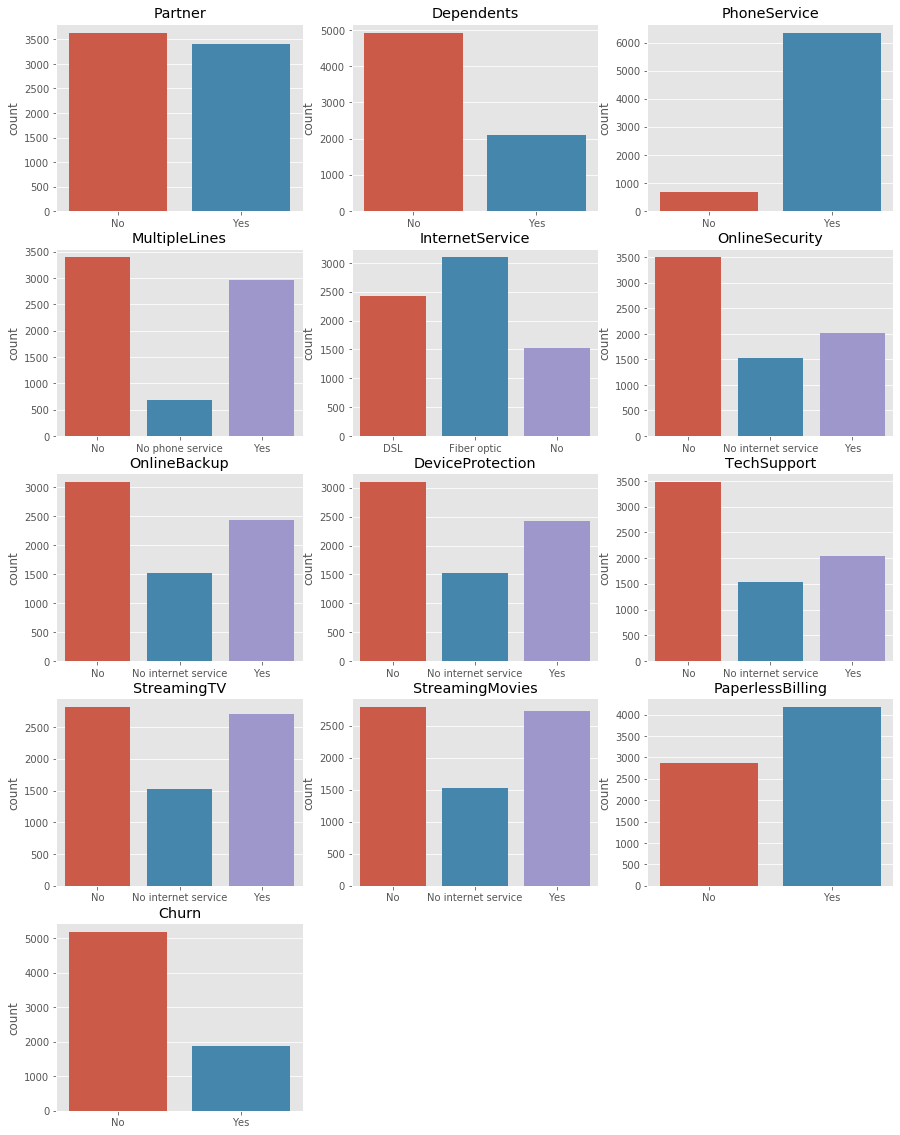

In [39]:
#import math so that we can use ceil function to round our values up for subplotting purposes
import math

#Plot our binary data

fig1 = plt.figure(figsize=(15,20))
for idx, val in enumerate(binary.columns):
    plt.subplot(math.ceil(len(binary.columns)/3),3,idx+1)
    #Sort the values before plotting them... some issues due to names of values...
    #If we really cared, we could change value names so that alphabetically they would appear in desired order
    sns.countplot(x=val, data = df.sort_values(val))
    plt.xlabel('')
    plt.title(val)

#Using barplot and calculating percentage, we could make these plots more meaningful

In [40]:
# We have identified that 
#drop the columns that have more than Yes or No
binary = binary.drop(columns = df[['MultipleLines','InternetService']], axis=1)

#df[i][df.Churn == 'Yes'] = 1
#df[i][data.Gender == 'No'] = 0

In [41]:
#Find churn percentage
pt_churn = len(df.loc[df.Churn == 'Yes'])/len(df)
pt_stay = 1 - pt_churn
print(pt_churn)
print(pt_stay)

0.2653698707936959
0.7346301292063041


Text(0.5, 1.0, 'Likelihood to Churn')

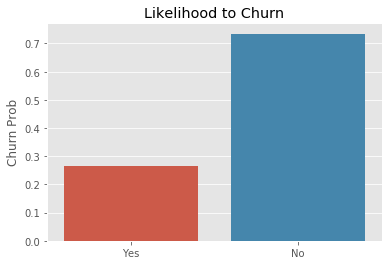

In [42]:
#Graph Churn
sns.barplot(y = [pt_churn,pt_stay], x = ['Yes','No'])
plt.ylabel('Churn Prob')
plt.title('Likelihood to Churn')

In [43]:
pt_churn_s = len(df.loc[(df.Churn == 'Yes') & (df.SeniorCitizen == 1)])/len(df)
pt_stay_s = len(df.loc[(df.Churn == 'No') & (df.SeniorCitizen == 1)])/len(df)

print(pt_churn_s)
print(pt_stay_s)

0.06758483600738321
0.09456197643049837


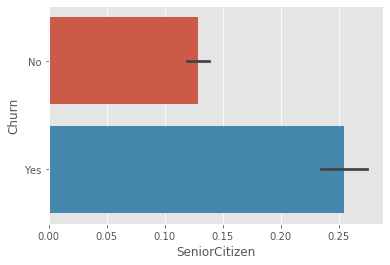

In [44]:
sns.barplot(x=df['SeniorCitizen'], y =df['Churn'])
#I don't understand why these would not add up to 100%? or why not to the mean churn pct
#Issue is with Churn not being a numeric value... 

In [45]:
#Let's do some fancier vis. Boxplots, heatmaps, etc

Let's do some modeling

In [48]:
#First clean up our data
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [51]:
#Luckily, only TotalCharges has null values, and not very many... we could just remove these columns, but let's impute instead
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.mean())

In [104]:
#Import libraries to prep our data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#We already have the categorical columns from previous analysis in the df called 'cat'
#Contract, Gender, PaymentMethod were not originally included
cat_col = list(cat.columns)
cat_col.extend(['Contract','PaymentMethod', 'gender'])

for i in cat_col:
    df[i] = LabelEncoder().fit_transform(df[i])

#define our dependant and independant variables
x = df.drop(columns = 'Churn')
y = df.loc[:, df.columns.intersection(['Churn'])]

#Split data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y)
